In [48]:
from keras import datasets
import matplotlib.pyplot as plt

In [45]:
'''

project name : fashion clothes classification --deep learning
author : @kanishksh4rma

'''

'\n\nproject name : fashion clothes classification --deep learning\nauthor : @kanishksh4rma\n\n'

In [49]:
#load the data

(X_train,y_train),(X_test,y_test)= datasets.fashion_mnist.load_data()

In [50]:
#print the shape of datas

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


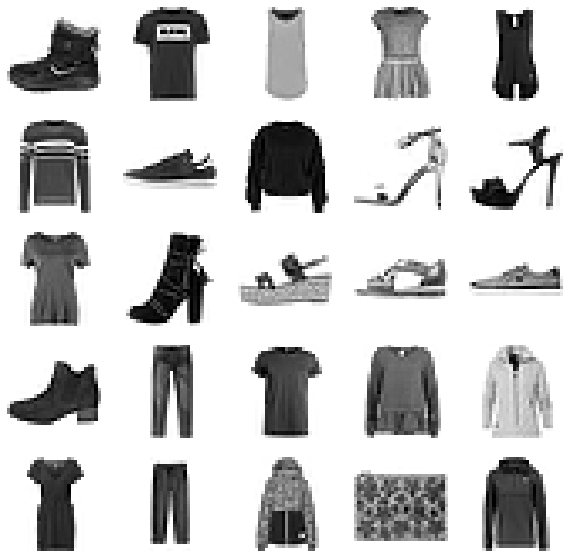

In [51]:
fig,ax = plt.subplots(5,5,figsize=(10,10))

for i,axs in enumerate(ax.flat):
  axs.imshow(X_train[i],cmap='binary',interpolation='nearest')
  axs.set_xticks([])
  axs.set_yticks([])
  axs.axis('off')
plt.show()

In [20]:
## Deep Learning --CNN

In [52]:
#import deep learning stuff

from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,BatchNormalization,Dropout

In [53]:
#reshape the input data

X_train = X_train.reshape(X_train.shape[0],28,28,1)
X_test = X_test.reshape(X_test.shape[0],28,28,1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

#hot encoder

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [54]:
#create the model

model = Sequential()
input_shape = (28,28,1)
model.add(Conv2D(64,(3,3),activation='relu',input_shape=input_shape))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D())
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(55,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))

model.compile(metrics=['accuracy'],optimizer='adam',loss='categorical_crossentropy')


In [55]:
# model fiting

model.fit(X_train,y_train,epochs=2)

Epoch 1/2
60000/60000 [==============================] - 279s 5ms/step - loss: 0.5201 - accuracy: 0.8120
Epoch 2/2
60000/60000 [==============================] - 282s 5ms/step - loss: 0.3502 - accuracy: 0.8731


In [56]:
#test the validity
print('Accuracy : ',round(model.evaluate(X_test,y_test)[1] *100,1),'%')

10000/10000 [==============================] - 11s 1ms/step
Accuracy :  88.1 %
